<h1><center>La mise en place d'un modèle de classification d'une patiente de diabète</center></h1>


<h2><li> <strong>Pregnancies :</strong> nombre de grossesse
<li> <strong>Glucose :</strong> Taux de glucose dans le sang
<li> <strong>BloodPressure :</strong> La pression sanguine en (mm Hg)
<li> <strong>SkinThickness :</strong> Épaisseur de la peau (Épaisseur du pli cutané du triceps (mm))
<li> <strong> Insulin :</strong> insuline sérique de 2 heures (mu U/ml)
<li> <strong>BMI :</strong>  Indice de masse corporelle (poids en kg/ (taille en m)^2)
<li> <strong>DiabetesPedigreeFunction :</strong> Fonction pedigree du diabète (Hérédité)
<li> <strong>Age :</strong> l’âge de l’unité statistique
<li> <strong>Outcome :</strong> La variable objectif contenant la classe des personnes atteintes ou non par le diabète (0/1)
</h2>

In [84]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [85]:
data=pd.read_csv('diabetes.csv',sep=",")

In [86]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [87]:
data.shape

(768, 9)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [89]:
from seaborn import heatmap

In [90]:
corr=data.corr("spearman")

In [91]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130734,0.185127,-0.085222,-0.126723,0.000132,-0.043242,0.607216,0.198689
Glucose,0.130734,1.000000,0.235191,0.060022,0.213206,0.231141,0.091293,0.285045,0.475776
BloodPressure,0.185127,0.235191,1.000000,0.126486,-0.006771,0.292870,0.030046,0.350895,0.142921
SkinThickness,-0.085222,0.060022,0.126486,1.000000,0.541000,0.443615,0.180390,-0.066795,0.089728
Insulin,-0.126723,0.213206,-0.006771,0.541000,1.000000,0.192726,0.221150,-0.114213,0.066472
BMI,0.000132,0.231141,0.292870,0.443615,0.192726,1.000000,0.141192,0.131186,0.309707
DiabetesPedigreeFunction,-0.043242,0.091293,0.030046,0.180390,0.221150,0.141192,1.000000,0.042909,0.175353
Age,0.607216,0.285045,0.350895,-0.066795,-0.114213,0.131186,0.042909,1.000000,0.309040
Outcome,0.198689,0.475776,0.142921,0.089728,0.066472,0.309707,0.175353,0.309040,1.000000


<AxesSubplot:>

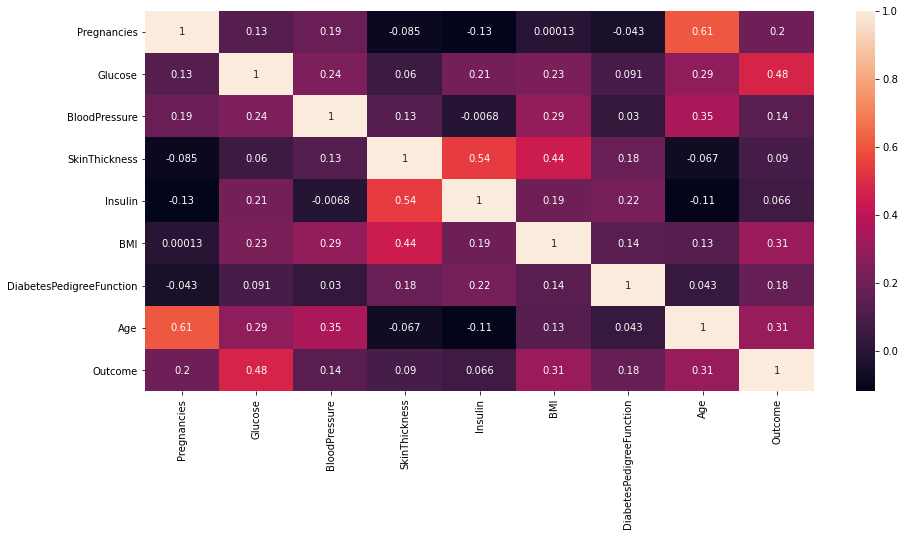

In [92]:
plt.figure(figsize=(15,7))
heatmap(corr,annot=True,robust=True)

D'après cette matrice des corrélations nous avons des données faiblement corrélées en globale alors l'exploration avec analyse en composante principale aura peut d'effet en l'occurence si on utilise cette dernière pour réduire la dimension on aura une perte des données conséquentes et il sera difficile d'avoir une vision réaliste à travers des plans factoriels que nous pourrions considérer. Nous allons vérifier célà et après nous utiliserons des méthodes adéquates à des données non linéaires notamment avec <strong>TSNE</strong> ou <strong>UMAP</strong>

In [93]:
data["Outcome"]=data["Outcome"].astype("category")

In [94]:
X=data.select_dtypes("number")
y=data["Outcome"]

In [95]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


<h1><center>Analyse exploratoire </center></h1>

<h2><li>Analyse en composante principale<h2>

<AxesSubplot:title={'center':'Distribution des caractéristiques des patientes'}>

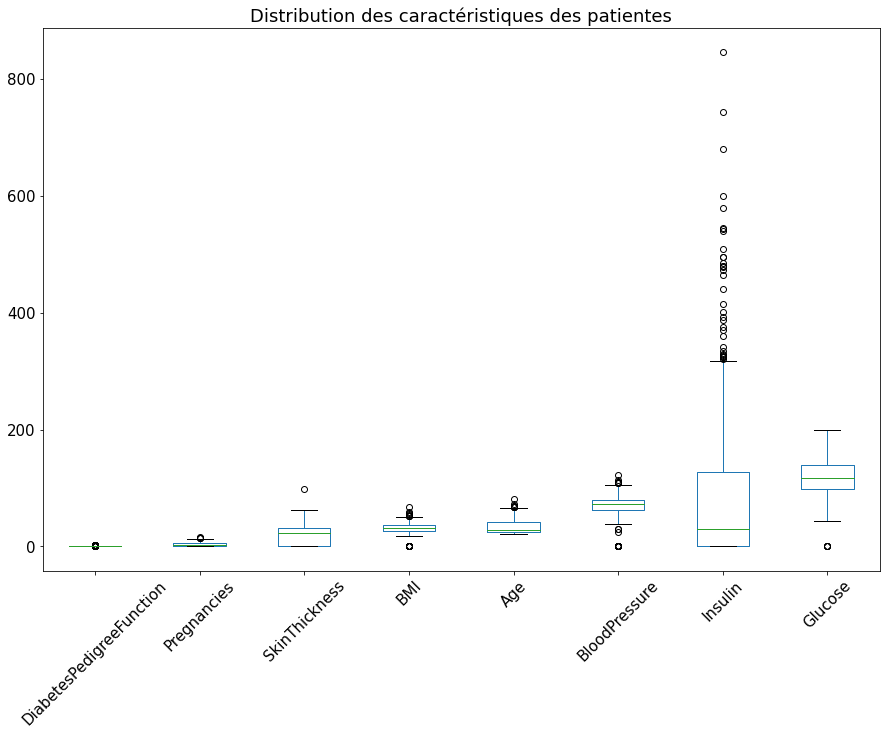

In [96]:
plt.rcParams.update({"font.size":15})
sorted_by_mean=X.mean().sort_values(ascending=True)
X[sorted_by_mean.index].plot(kind="box", figsize=(15,10),rot=45,title="Distribution des caractéristiques des patientes")

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [98]:
X_scaled=StandardScaler().fit_transform(X)

<AxesSubplot:title={'center':'Distribution des caractéristiques des patientes'}>

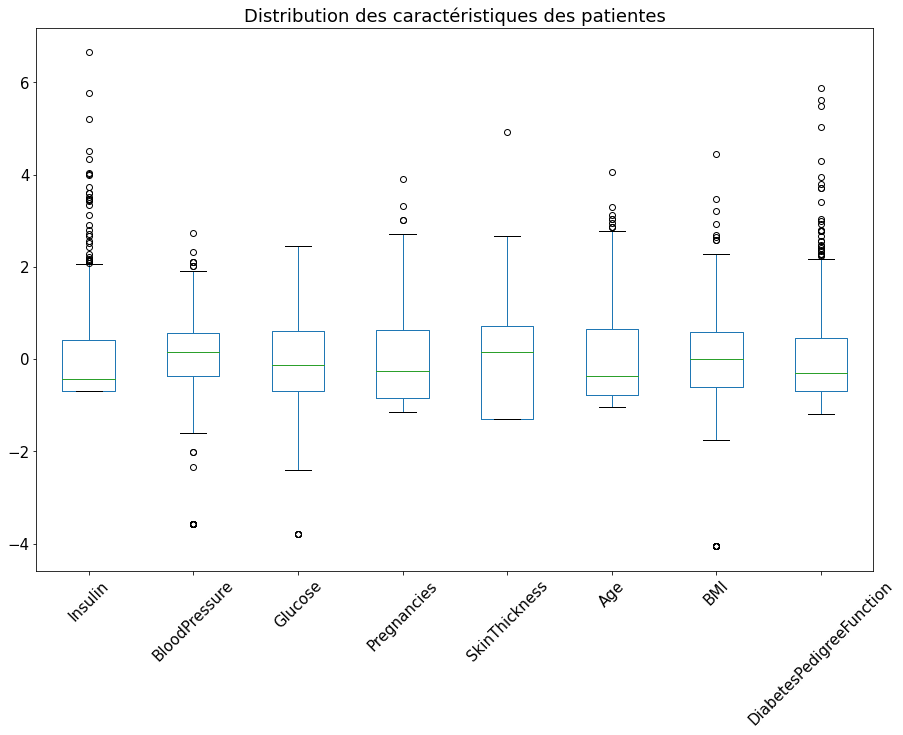

In [99]:
plt.rcParams.update({"font.size":15})
X_scaled=pd.DataFrame(X_scaled,columns=X.columns,index=X.index)
sorted_by_mean=X_scaled.mean().sort_values(ascending=True)
X_scaled[sorted_by_mean.index].plot(kind="box", figsize=(15,10),rot=45,title="Distribution des caractéristiques des patientes")

In [100]:
pca=PCA()
X_pca=pca.fit_transform(X_scaled)

In [101]:
col=["F"+str(i) for i in range(1,X_pca.shape[1]+1)]
X_pca=pd.DataFrame(X_pca,columns=col,index=X.index)

In [102]:
X_pca.head()

,F1,F2,F3,F4,F5,F6,F7,F8
0,1.068503,1.234895,0.095930,0.496990,-0.109985,0.357183,0.858821,0.974304
1,-1.121683,-0.733852,-0.712938,0.285056,-0.389507,-0.406329,0.757034,0.354215
2,-0.396477,1.595876,1.760678,-0.070395,0.906474,-0.040018,-1.152990,1.068528
3,-1.115781,-1.271241,-0.663729,-0.579123,-0.356060,-0.412520,-0.029247,-0.130648
4,2.359334,-2.184819,2.963107,4.033099,0.592684,1.078341,0.549358,-0.319352


In [103]:
eigen_values=pca.explained_variance_ratio_
explained_variance=pd.Series(dict(zip(X_pca.columns,100.0*pca.explained_variance_ratio_)))

<AxesSubplot:title={'center':'Inertie expliquée par axe factoriel'}>

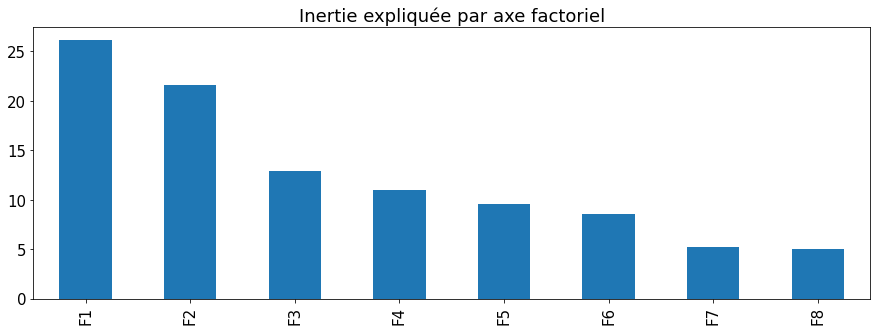

In [104]:
explained_variance.plot(kind="bar",title="Inertie expliquée par axe factoriel",figsize=(15,5))

Commeci-dessus expliquées chaque variables dans notre dataset apporte une information nouvelle de plus 5\% pour expliquer les individus. Ainsi la réduction de dimension est très couteuse en terme de perte d'information.

In [105]:
explained_variance["F1"]+explained_variance["F2"]+explained_variance["F3"]

60.69024943865848

In [106]:
dict_colors={1:"red", 0:"green"}
y_colors=[dict_colors[yi] for yi in y]

<AxesSubplot:title={'center':'Projection des individus sur le 1er plan factoriel'}, xlabel='F1', ylabel='F2'>

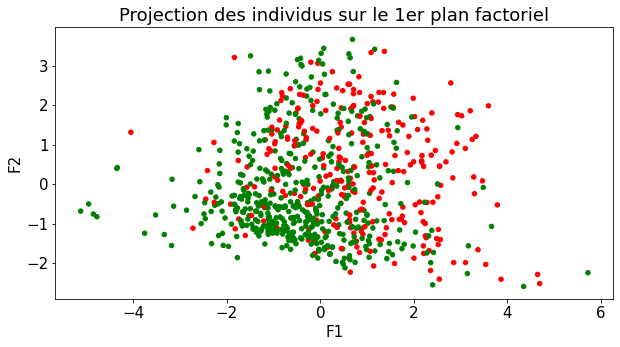

In [107]:
X_pca.plot(kind="scatter",x="F1",y="F2",figsize=(10,5),title="Projection des individus sur le 1er plan factoriel",color=y_colors)

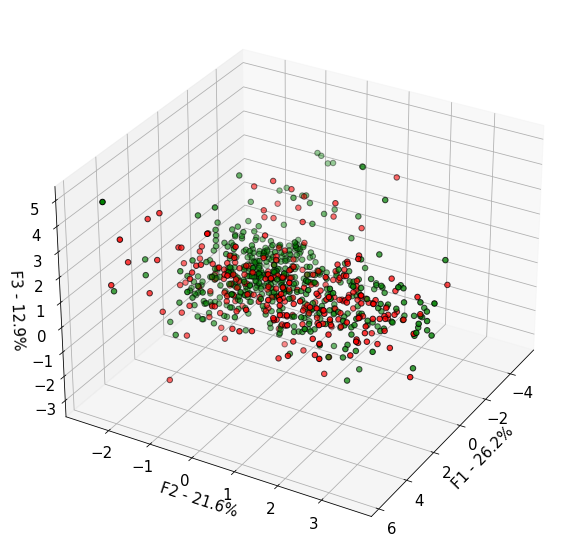

In [108]:
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(projection="3d")
ax.scatter(X_pca['F1'], X_pca['F2'], X_pca['F3'], marker='o', s=30, edgecolor='k', facecolor=y_colors)
ax.set_xlabel('F1 - ' + '{:.1f}%'.format(explained_variance['F1']))
ax.set_ylabel('F2 - ' + '{:.1f}%'.format(explained_variance['F2']))
ax.set_zlabel('F3 - ' + '{:.1f}%'.format(explained_variance['F3']))
ax.view_init(elev=30, azim=30)

Bon, les trois axes ne peuvent suffir pour détecter les clusters qui doivent se former pour différencier les patients atteintes ou non du diabète

<h2><li> La méthode de l'anlyse des données non linéaire TSNE</h2>

In [109]:
from sklearn.manifold import TSNE

In [110]:
tsne=TSNE(n_components=3,init="pca",random_state=1, n_jobs=-1)

In [111]:
X_tsne=tsne.fit_transform(X_scaled)

In [112]:
cols=["DIM"+str(c) for c in range(1,X_tsne.shape[1]+1)]
X_tsne=pd.DataFrame(X_tsne, columns=cols)
X_tsne.head()

,DIM1,DIM2,DIM3
0,20.787067,17.154943,-1.065748
1,-4.972728,-7.448393,28.701159
2,-14.577726,30.642973,-11.706174
3,-12.327821,-15.826991,18.264530
4,34.801254,-38.816181,-17.562658


<AxesSubplot:xlabel='DIM1', ylabel='DIM2'>

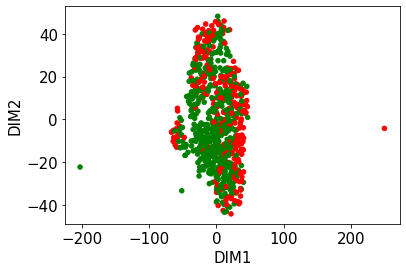

In [113]:
#%matplotlib i
X_tsne.plot(kind="scatter",x="DIM1",y="DIM2",color=y_colors)

In [114]:
#%matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

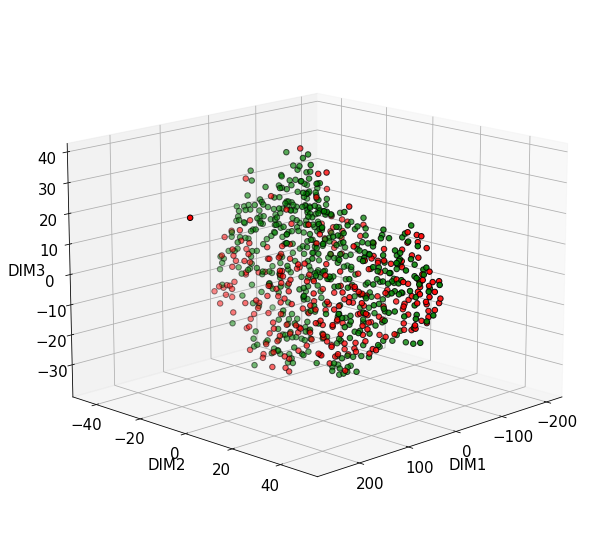

In [115]:
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(projection="3d")
ax.scatter(X_tsne['DIM1'], X_tsne['DIM2'], X_tsne['DIM3'], marker='o', s=30, edgecolor='k', facecolor=y_colors)
ax.set_xlabel('DIM1')
ax.set_ylabel('DIM2')
ax.set_zlabel('DIM3')
ax.view_init(elev=15, azim=45)

<AxesSubplot:title={'center':'La distribution des individus par classe'}, ylabel='Frequency'>

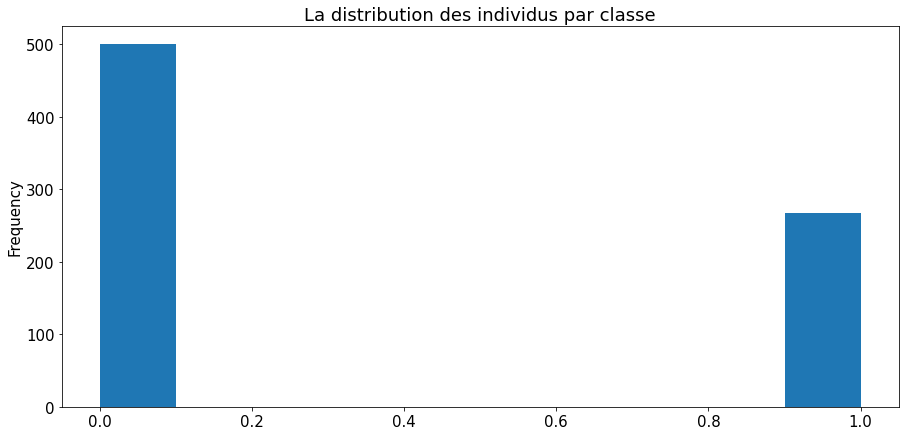

In [116]:
plt.rcParams.update({'font.size':15})
data["Outcome"].astype(int).plot(kind="hist",figsize=(15,7),title="La distribution des individus par classe")

Nous observons une surreprésentation des individus saine par rapport aux diabétique alors pour garantir la repartition des individus des deux classes à part égale dans les données d'entraînement aussi bien que les données test ainsi nous pourrions éviter au modèle de faire un surapprentissage pour une classe par rapport à l'autre.

<h2>Construction du modèle avec DecisionTree encore appelé <strong>Arbre de décision</strong></h2>

In [117]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

In [118]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2)

In [119]:
classifier=DecisionTreeClassifier()
scaler=StandardScaler()
random_state=1

In [136]:
cross_validation=StratifiedKFold(n_splits=3,random_state=random_state,shuffle=True)
pipeline=Pipeline([('scaler',scaler),('classifier',classifier)])
accuracy=model_selection.cross_val_score(pipeline,X_train,y_train,cv=cross_validation)
print("Mean accuracy:{:.3%}".format(accuracy.mean()))

Mean accuracy:68.887%


Le modèle de random étant basé sur les arbres de décision nous allons commencer de voir la performance de l'arbre de decision en variant les paramètres tels que:
<li> <strong>max_depth:</strong> le nombre de noeuds dans l'arbre
<li> <strong>max_features:</strong> le nombre de variable qui doit intervenir dans la prise de décision sur chaque nœud

<h2> <center> Visualisation de l'arbre de decision </center> </h2>

In [126]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydot
classifier.fit(X_train,y_train)
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png("decision_tree.png")

# Optimisation de DecisionTreeClassifier

In [127]:
from sklearn.model_selection import GridSearchCV
max_depth=range(1,15)
max_features=range(1,8)
criterion=["gini","entropy"]
min_samples_split=range(1,10)
min_samples_leaf=range(1,10)

param=[{"max_depth":max_depth,
        "max_features":max_features,
        "criterion":criterion,
        "min_samples_split":min_samples_split,
        "min_samples_leaf":min_samples_leaf
       
       }]

In [82]:
clf_optimal=GridSearchCV(clf,
                         param_grid=param,
                        cv=5,
                         n_jobs=-1,
                         verbose=1
                        )
clf_optimal.fit(X_train,y_train)

Fitting 5 folds for each of 15876 candidates, totalling 79380 fits


C:\Users\azuz\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.64814815 0.63873313 ... 0.71310142 0.72622015 0.72242991]
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 15),
                          'max_features': range(1, 8),
                          'min_samples_leaf': range(1, 10),
                          'min_samples_split': range(1, 10)}],
             verbose=1)

In [83]:
print("les paramètres optimaux:",clf_optimal.best_params_)

les paramètres optimaux: {'criterion': 'gini', 'max_depth': 9, 'max_features': 7, 'min_samples_leaf': 8, 'min_samples_split': 6}


In [139]:
clf_optimal=DecisionTreeClassifier( criterion='gini',
                                   max_depth=9,
                                   max_features=7,
                                   min_samples_leaf=8,
                                   min_samples_split=6
                                  )
clf_optimal.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, max_features=7, min_samples_leaf=8,
                       min_samples_split=6)

In [145]:
cross_validation=StratifiedKFold(n_splits=3,random_state=random_state,shuffle=True)
pipeline=Pipeline([('scaler',scaler),('classifier',clf_optimal)])
accuracy=model_selection.cross_val_score(pipeline,X_train,y_train,cv=cross_validation)
print("Mean accuracy:{:.3%}".format(accuracy.mean()))

Mean accuracy:72.965%


In [140]:
y_predict=clf_optimal.predict(X_test)

print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       104
           1       0.60      0.54      0.57        50

    accuracy                           0.73       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.73      0.73      0.73       154



<h2>Construction du modèle avec RandomForest encore appelé <strong>Forêt aléatoire</strong></h2>

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
classifier=RandomForestClassifier(n_estimators=100,
                                 max_depth=10,
                                 criterion='entropy',
                                 bootstrap=True,
                                 min_samples_split=5,
                                 max_features=len(data.columns)-1
                                 )
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=8,
                       min_samples_split=5)

In [148]:
y_test_pred=classifier.predict(X_test)
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       104
           1       0.61      0.60      0.61        50

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154



In [150]:
cross_validation=StratifiedKFold(n_splits=3,random_state=random_state,shuffle=True)
pipeline=Pipeline([('scaler',scaler),('classifier',classifier)])
accuracy=model_selection.cross_val_score(pipeline,X_train,y_train,cv=cross_validation)
print("Mean accuracy:{:.3%}".format(accuracy.mean()))

Mean accuracy:75.243%


# L'impact de la variation des paramètres sur l'accuracy du modèle de prédiction

L'accuracy du modèle avec RandomForest non optimisé est: 72.294%
Le recall du modèle avec RandomForest non optimisé est: 52.500%
La précision du modèle avec RandomForest non optimisé est: 61.765%
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       151
           1       0.62      0.53      0.57        80

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.72      0.72      0.72       231



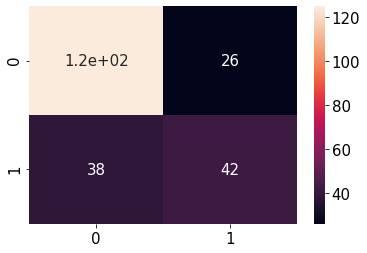

In [124]:
classifier=RandomForestClassifier(n_estimators=100,
                                 max_depth=10,
                                 criterion='entropy',
                                 bootstrap=True,
                                 min_samples_split=5,
                                 max_features=len(data.columns)-1
                                 )
classifier.fit(X_train,y_train)
y_test_pred=classifier.predict(X_test)
confu_mat=metrics.confusion_matrix(y_test,y_test_pred)
sns.heatmap(confu_mat,annot=True)
acc=metrics.accuracy_score(y_test,y_test_pred)
recall=metrics.recall_score(y_test,y_test_pred)
precision=metrics.precision_score(y_test,y_test_pred)
print("L'accuracy du modèle avec {} non optimisé est: {:.3%}".format("RandomForest",acc))
print("Le recall du modèle avec {} non optimisé est: {:.3%}".format("RandomForest",recall))
print("La précision du modèle avec {} non optimisé est: {:.3%}".format("RandomForest",precision))
print(metrics.classification_report(y_test,y_test_pred))

L'accuracy du modèle avec RandomForest non optimisé est: 73.593%
Le recall du modèle avec RandomForest non optimisé est: 55.000%
La précision du modèle avec RandomForest non optimisé est: 63.768%
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       151
           1       0.64      0.55      0.59        80

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



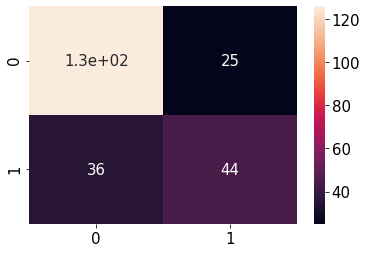

In [125]:
classifier=RandomForestClassifier(n_estimators=100,
                                 max_depth=5,
                                 criterion='entropy',
                                 bootstrap=True,
                                 min_samples_split=5,
                                 max_features=len(data.columns)-1
                                 )
classifier.fit(X_train,y_train)
y_test_pred=classifier.predict(X_test)
confu_mat=metrics.confusion_matrix(y_test,y_test_pred)
sns.heatmap(confu_mat,annot=True)
acc=metrics.accuracy_score(y_test,y_test_pred)
recall=metrics.recall_score(y_test,y_test_pred)
precision=metrics.precision_score(y_test,y_test_pred)
print("L'accuracy du modèle avec {} non optimisé est: {:.3%}".format("RandomForest",acc))
print("Le recall du modèle avec {} non optimisé est: {:.3%}".format("RandomForest",recall))
print("La précision du modèle avec {} non optimisé est: {:.3%}".format("RandomForest",precision))
print(metrics.classification_report(y_test,y_test_pred))

L'accuracy du modèle avec RandomForest non optimisé est: 74.459%
Le recall du modèle avec RandomForest non optimisé est: 55.000%
La précision du modèle avec RandomForest non optimisé est: 65.672%
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



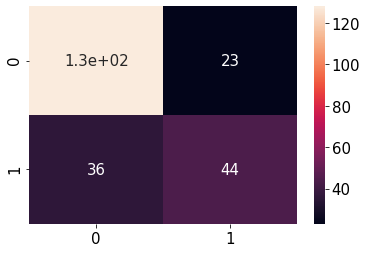

In [126]:
classifier=RandomForestClassifier(n_estimators=100,
                                 max_depth=100,
                                 criterion='entropy',
                                 bootstrap=True,
                                 min_samples_split=5,
                                 max_features=len(data.columns)-1
                                 )
classifier.fit(X_train,y_train)
y_test_pred=classifier.predict(X_test)
confu_mat=metrics.confusion_matrix(y_test,y_test_pred)
sns.heatmap(confu_mat,annot=True)
acc=metrics.accuracy_score(y_test,y_test_pred)
recall=metrics.recall_score(y_test,y_test_pred)
precision=metrics.precision_score(y_test,y_test_pred)
print("L'accuracy du modèle avec {} non optimisé est: {:.3%}".format("RandomForest",acc))
print("Le recall du modèle avec {} non optimisé est: {:.3%}".format("RandomForest",recall))
print("La précision du modèle avec {} non optimisé est: {:.3%}".format("RandomForest",precision))
print(metrics.classification_report(y_test,y_test_pred))

L'accuracy du modèle avec RandomForest non optimisé est: 75.325%
Le recall du modèle avec RandomForest non optimisé est: 58.750%
La précision du modèle avec RandomForest non optimisé est: 66.197%
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       151
           1       0.66      0.59      0.62        80

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



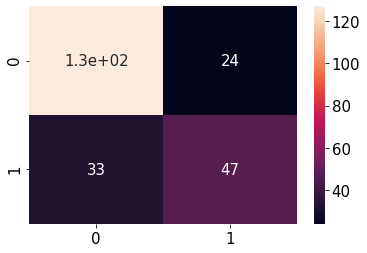

In [127]:
classifier=RandomForestClassifier(n_estimators=1000,
                                 max_depth=10,
                                 criterion='entropy',
                                 bootstrap=True,
                                 min_samples_split=5,
                                 max_features=len(data.columns)-1
                                 )
classifier.fit(X_train,y_train)
y_test_pred=classifier.predict(X_test)
confu_mat=metrics.confusion_matrix(y_test,y_test_pred)
sns.heatmap(confu_mat,annot=True)
acc=metrics.accuracy_score(y_test,y_test_pred)
recall=metrics.recall_score(y_test,y_test_pred)
precision=metrics.precision_score(y_test,y_test_pred)
print("L'accuracy du modèle avec {} non optimisé est: {:.3%}".format("RandomForest",acc))
print("Le recall du modèle avec {} non optimisé est: {:.3%}".format("RandomForest",recall))
print("La précision du modèle avec {} non optimisé est: {:.3%}".format("RandomForest",precision))
print(metrics.classification_report(y_test,y_test_pred))

L'accuracy du modèle avec RandomForest non optimisé est: 74.892%
Le recall du modèle avec RandomForest non optimisé est: 58.750%
La précision du modèle avec RandomForest non optimisé est: 65.278%
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.65      0.59      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.75      0.75       231



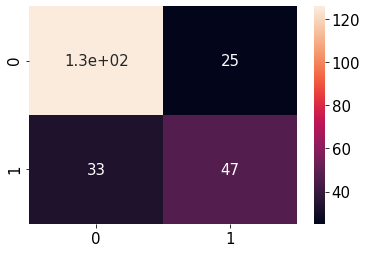

In [128]:
classifier=RandomForestClassifier(n_estimators=1000,
                                 max_depth=5,
                                 criterion='entropy',
                                 bootstrap=True,
                                 min_samples_split=20,
                                 max_features=len(data.columns)-1
                                 )
classifier.fit(X_train,y_train)
y_test_pred=classifier.predict(X_test)
confu_mat=metrics.confusion_matrix(y_test,y_test_pred)
sns.heatmap(confu_mat,annot=True)
acc=metrics.accuracy_score(y_test,y_test_pred)
recall=metrics.recall_score(y_test,y_test_pred)
precision=metrics.precision_score(y_test,y_test_pred)
print("L'accuracy du modèle avec {} non optimisé est: {:.3%}".format("RandomForest",acc))
print("Le recall du modèle avec {} non optimisé est: {:.3%}".format("RandomForest",recall))
print("La précision du modèle avec {} non optimisé est: {:.3%}".format("RandomForest",precision))
print(metrics.classification_report(y_test,y_test_pred))

<h2><center>Optimisation des hyperparamètres</center></h2>

In [98]:
estimators_range=[10,100,200,500,800,1000]
criter_range=['gini','entropy']
max_depth=[5,10,15,20,25,30]
min_samples_split=range(5,10)
min_samples_leaf=[1,2,5,10]
param_grid={'n_estimators':estimators_range,'criterion':criter_range,'max_depth':max_depth,'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf}

In [99]:
optimal_classifier=model_selection.GridSearchCV(RandomForestClassifier(),
                                                 param_grid,
                                                 cv=5,
                                                 verbose=2,
                                                 n_jobs=-1                                                
                             )
optimal_classifier.fit(X_train,y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': range(5, 10),
                         'n_estimators': [10, 100, 200, 500, 800, 1000]},
             verbose=2)

In [100]:
print("Les hyperparamètres optimaux sont:{} with a score:{:.2f}".format(optimal_classifier.best_params_,optimal_classifier.best_score_))

Les hyperparamètres optimaux sont:{'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 10} with a score:0.78


<h2><center>La performance du model optimisé sur le dataset</center></h2>

L'accuracy du modèle avec RandomForest optimisé est: 74.026%
Le recall du modèle avec RandomForest optimisé est: 54.000%
La précision du modèle avec RandomForest optimisé est: 61.364%
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       104
           1       0.61      0.54      0.57        50

    accuracy                           0.74       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.73      0.74      0.74       154



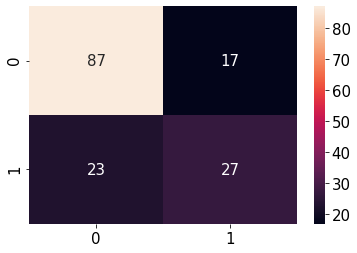

In [151]:
optimal_classifier=RandomForestClassifier(criterion='entropy',
                                         max_depth=25,
                                          min_samples_leaf=5,
                                          min_samples_split=7,
                                          n_estimators=10
                                         )
optimal_classifier.fit(X_train,y_train)
y_test_pred=optimal_classifier.predict(X_test)
confu_mat=metrics.confusion_matrix(y_test,y_test_pred)
sns.heatmap(confu_mat,annot=True)
acc=metrics.accuracy_score(y_test,y_test_pred)
recall=metrics.recall_score(y_test,y_test_pred)
precision=metrics.precision_score(y_test,y_test_pred)
print("L'accuracy du modèle avec {} optimisé est: {:.3%}".format("RandomForest",acc))
print("Le recall du modèle avec {} optimisé est: {:.3%}".format("RandomForest",recall))
print("La précision du modèle avec {} optimisé est: {:.3%}".format("RandomForest",precision))
print(metrics.classification_report(y_test,y_test_pred))

In [158]:
cross_validation=StratifiedKFold(n_splits=10,random_state=random_state,shuffle=True)
pipeline=Pipeline([('scaler',scaler),('classifier',optimal_classifier)])
accuracy=model_selection.cross_val_score(pipeline,X_train,y_train,cv=cross_validation)
print("Mean accuracy:{:.3%}".format(accuracy.mean()))

Mean accuracy:76.063%


In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

Classifiers=[KNeighborsClassifier,SVC,LogisticRegression,RandomForestClassifier,MLPClassifier,
             LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis,XGBClassifier]

In [154]:
import pandas as pd

col=["Name","Accuracy"]
df=pd.DataFrame(columns=col)
for classifier in Classifiers:
    Name=classifier.__name__
    model=classifier().fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=metrics.accuracy_score(y_test,y_pred)
    print("***Result***")
    print("="*40)
    print("{} \n Accuracy:{:.4%}".format(Name,acc))
    print("="*40)
    df1=pd.DataFrame([[Name,acc]],columns=col)
    df=df.append(df1)

***Result***
KNeighborsClassifier 
 Accuracy:75.3247%
***Result***
SVC 
 Accuracy:75.3247%


C:\Users\azuz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


***Result***
LogisticRegression 
 Accuracy:75.3247%
***Result***
RandomForestClassifier 
 Accuracy:74.0260%
***Result***
MLPClassifier 
 Accuracy:71.4286%
***Result***
LinearDiscriminantAnalysis 
 Accuracy:75.9740%
***Result***
QuadraticDiscriminantAnalysis 
 Accuracy:70.1299%
[01:43:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
***Result***
XGBClassifier 
 Accuracy:74.6753%


C:\Users\azuz\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [161]:
from numpy import mean,std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
cross_validation=StratifiedKFold(n_splits=3,random_state=random_state,shuffle=True)
pipeline=Pipeline([('scaler',scaler),('classifier',model)])
# evaluate model
scores=model_selection.cross_val_score(pipeline,X_train,y_train,scoring='accuracy',cv=cross_validation,n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.767 (0.025)


In [162]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LinearDiscriminantAnalysis())])

In [163]:
predictions=pipeline.predict(X_test)
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       104
           1       0.65      0.56      0.60        50

    accuracy                           0.76       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



Enfin, notre model permet de detecter 80% des personnes saines et 65% des diabétiques. Du point de vue global, le modèle est plutôt satisfaisant mais il laisse 35% des diabétiques sans notification alors il pourrait être judicier d'enrichir ces données pour aboutir à plus de précision.